Convolutional Forest Experiment (ConvRF)

The goal of this experiment is to demonstrate the capabilities of a convolutional forest against benchmarks such as naive random forests, simple CNN's, and more complex CNN's. We will perform 45 2-class Cifar classification tasks, and then plot the pairwise Cohen's Kappa Statistic differences between ConvRF vs naive RF, ConvRF vs a simple CNN, and ConvRF vs a more complex CNN.
Note: this experiment uses the class file and functions from /functions/ConvRF.py

In [6]:
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
import functions.ConvRF as ConvRF
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")

First we set the plotting figure parameters and some other multiprocessing necessities.

In [7]:
plt.rcParams["legend.loc"] = "best"
plt.rcParams['figure.facecolor'] = 'white'
%matplotlib inline
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# filter python warnings
def run():
    torch.multiprocessing.freeze_support()
    print('loop')

if __name__ == '__main__':
    run()
    

loop


Next we obtain the Cifar dataset.

In [8]:
# prepare CIFAR data

# normalize
scale = np.mean(np.arange(0, 256))
normalize = lambda x: (x - scale) / scale

# train data
cifar_trainset = datasets.CIFAR10(root='./', train=True, download=True, transform=None)
cifar_train_images = normalize(cifar_trainset.data)
cifar_train_labels = np.array(cifar_trainset.targets)

# test data
cifar_testset = datasets.CIFAR10(root='./', train=False, download=True, transform=None)
cifar_test_images = normalize(cifar_testset.data)
cifar_test_labels = np.array(cifar_testset.targets)


# transform
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = datasets.CIFAR10(root='./', train=True,
                                        download=True, transform=transform)
testset = datasets.CIFAR10(root='./', train=False,
                                       download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Next we define some CNN architectures. 

In [9]:
# define 3 CNN arhcitectures
class SimpleCNNOneFilter(torch.nn.Module):
    
    def __init__(self):
        super(SimpleCNNOneFilter, self).__init__()        
        self.conv1 = torch.nn.Conv2d(3, 1, kernel_size=10, stride=2)
        self.fc1 = torch.nn.Linear(144, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(-1, 144)
        x = self.fc1(x)
        return(x)

class SimpleCNN32Filter(torch.nn.Module):
    
    def __init__(self):
        super(SimpleCNN32Filter, self).__init__()        
        self.conv1 = torch.nn.Conv2d(3, 32, kernel_size=10, stride=2) # try 64 too, if possible
        self.fc1 = torch.nn.Linear(144*32, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(-1, 144*32)
        x = self.fc1(x)
        return(x)

class SimpleCNN32Filter2Layers(torch.nn.Module):
    
    def __init__(self):
        super(SimpleCNN32Filter2Layers, self).__init__()        
        self.conv1 = torch.nn.Conv2d(3, 32, kernel_size=10, stride=2)
        self.conv2 = torch.nn.Conv2d(32, 32, kernel_size=7, stride=1)
        self.fc1 = torch.nn.Linear(36*32, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 36*32)
        x = self.fc1(x)
        return(x)


Here we actually perform the experiments.

here
here
here
Comparing 0 vs 1
here
here
here
Comparing 0 vs 2
here
here
here
Comparing 0 vs 3
here
here
here
Comparing 0 vs 4
here
here
here
Comparing 0 vs 5
here
here
here
Comparing 0 vs 6
here
here
here
Comparing 0 vs 7
here
here
here
Comparing 0 vs 8
here
here
here
Comparing 0 vs 9
here
here
here
Comparing 1 vs 2
here
here
here
Comparing 1 vs 3
here
here
here
Comparing 1 vs 4
here
here
here
Comparing 1 vs 5
here
here
here
Comparing 1 vs 6
here
here
here
Comparing 1 vs 7
here
here
here
Comparing 1 vs 8
here
here
here
Comparing 1 vs 9
here
here
here
Comparing 2 vs 3
here
here
here
Comparing 2 vs 4
here
here
here
Comparing 2 vs 5
here
here
here
Comparing 2 vs 6
here
here
here
Comparing 2 vs 7
here
here
here
Comparing 2 vs 8
here
here
here
Comparing 2 vs 9
here
here
here
Comparing 3 vs 4
here
here
here
Comparing 3 vs 5
here
here
here
Comparing 3 vs 6
here
here
here
Comparing 3 vs 7
here
here
here
Comparing 3 vs 8
here
here
here
Comparing 3 vs 9
here
here
here
Comparing 4 vs 5
here
her

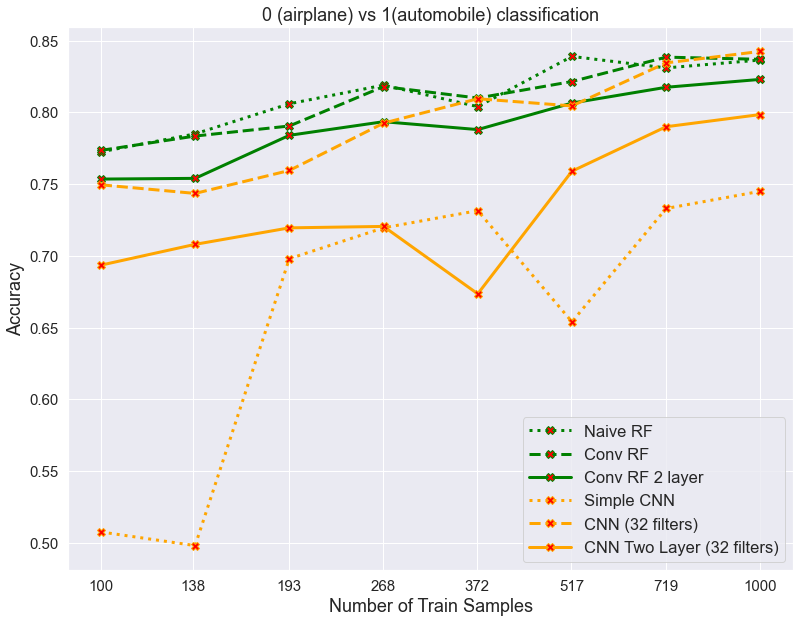

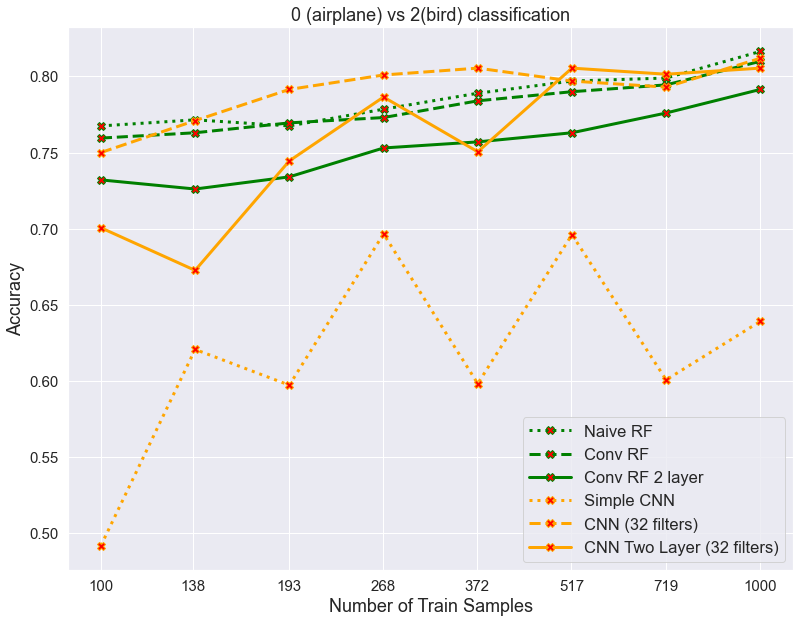

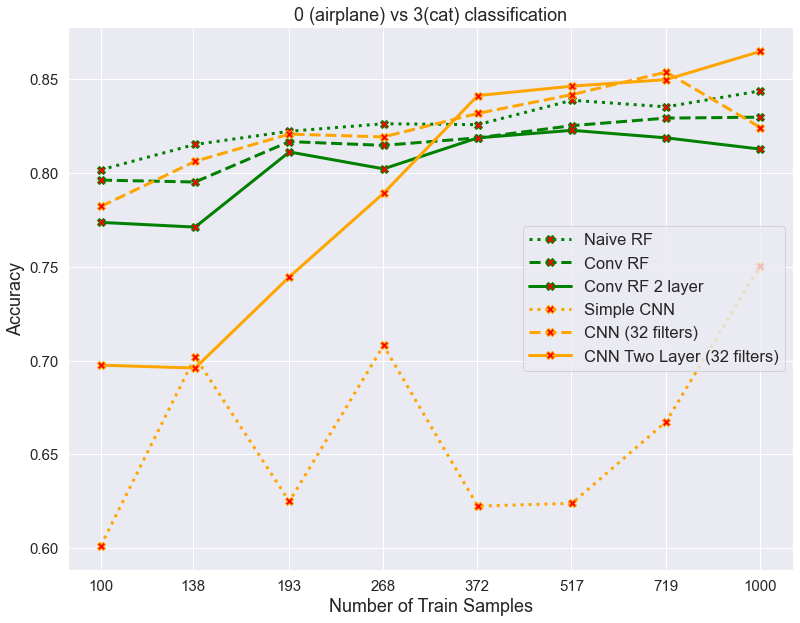

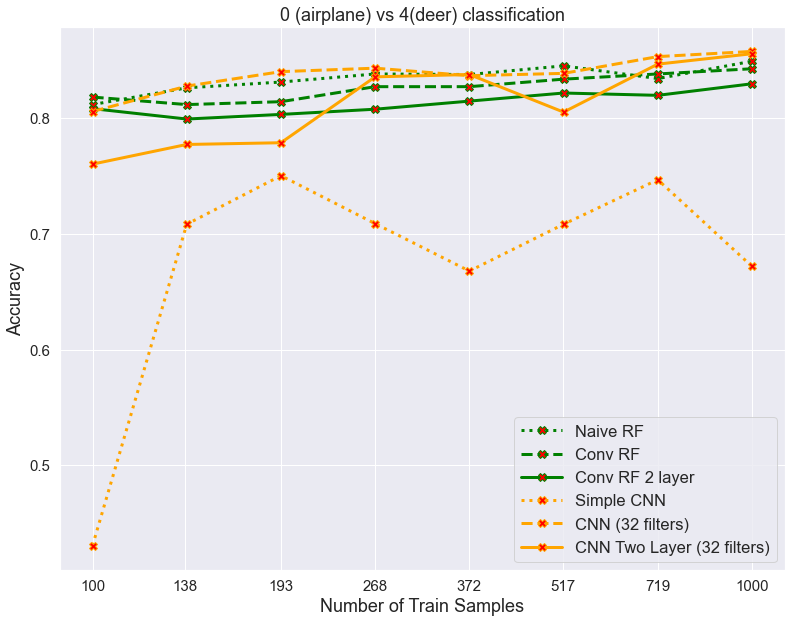

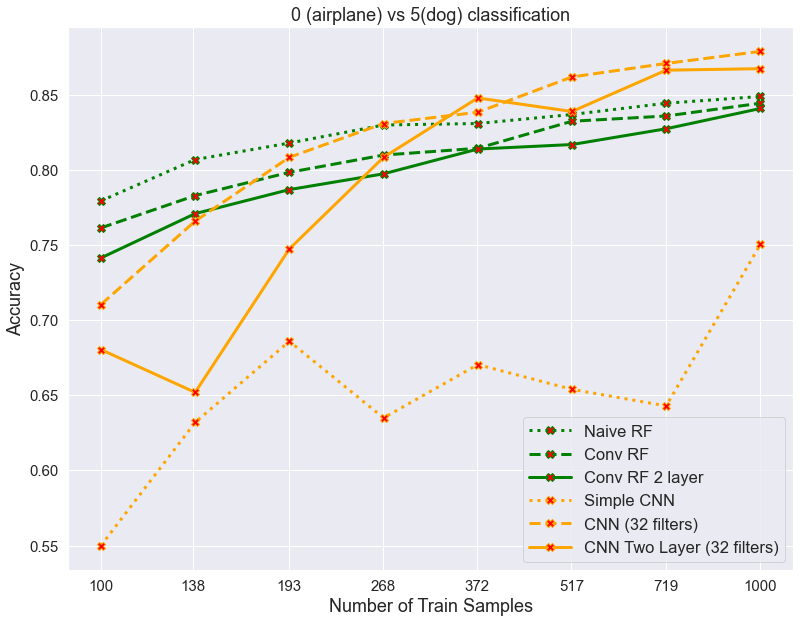

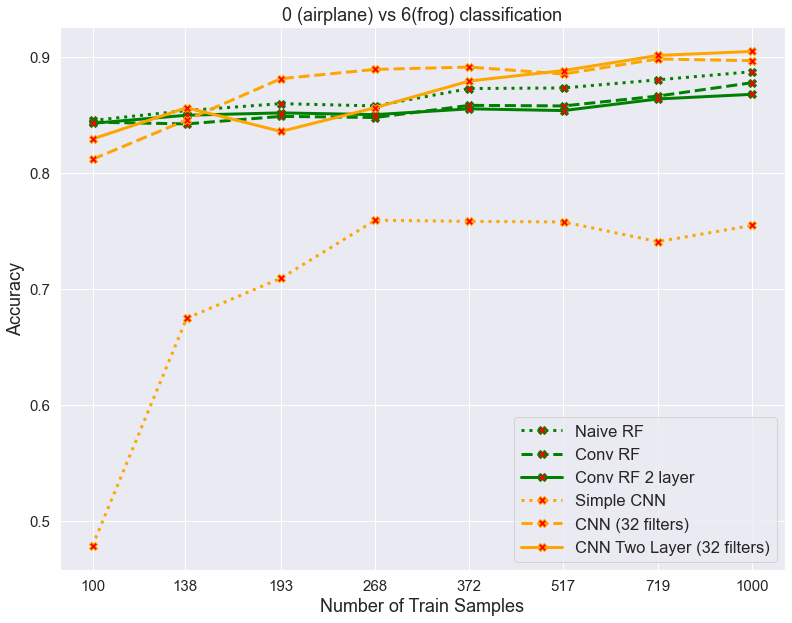

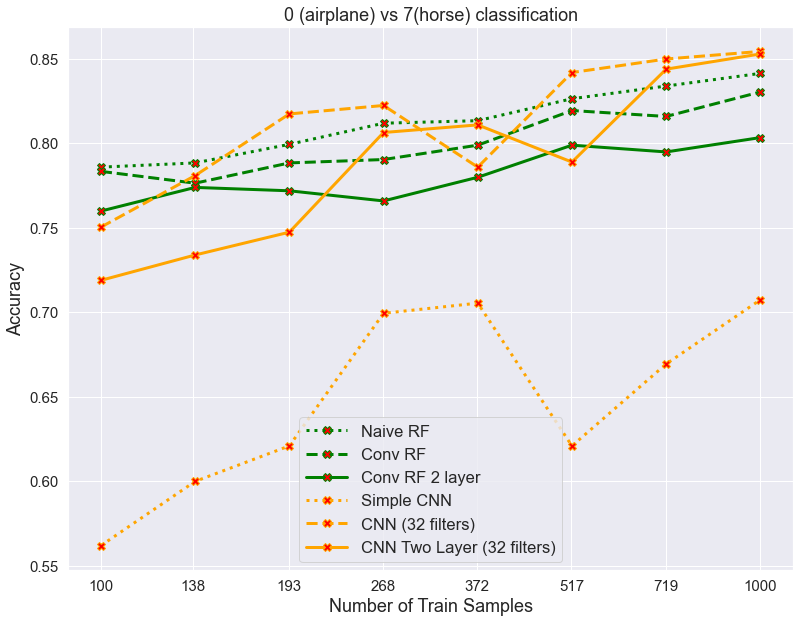

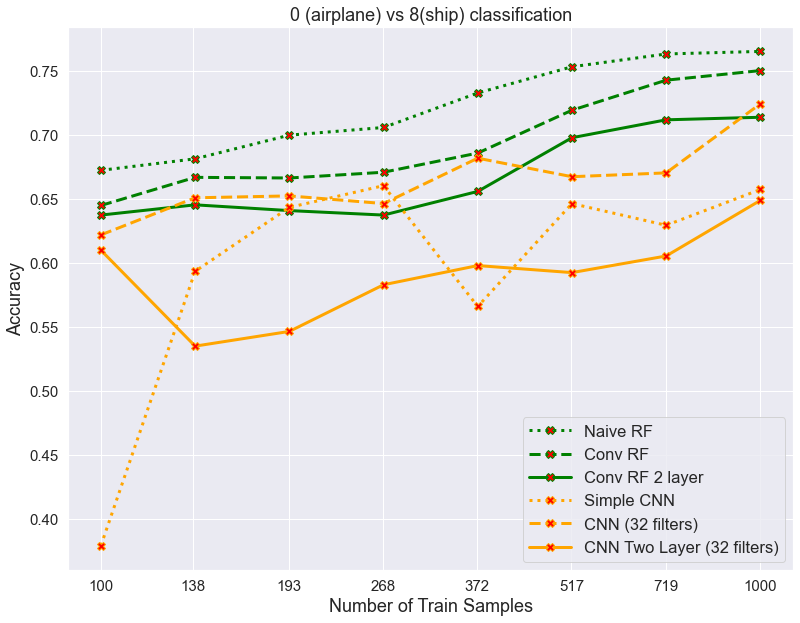

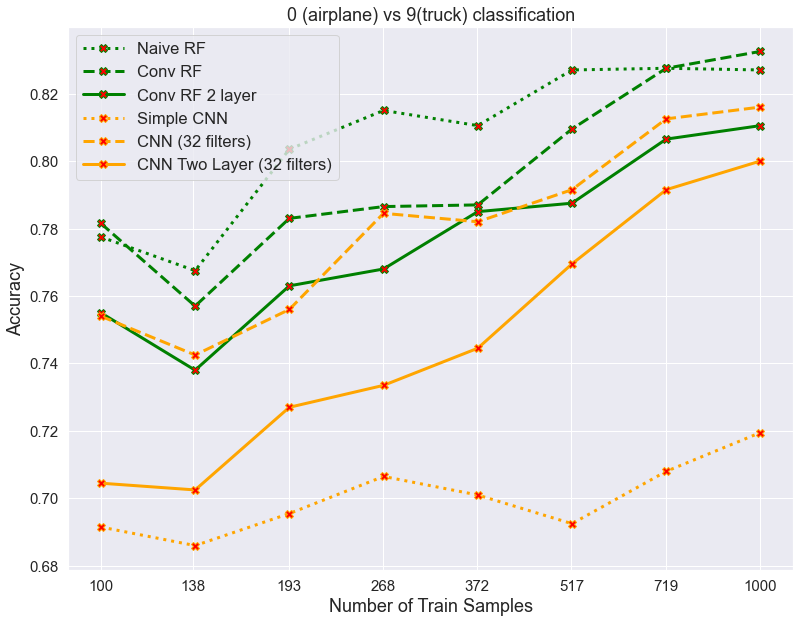

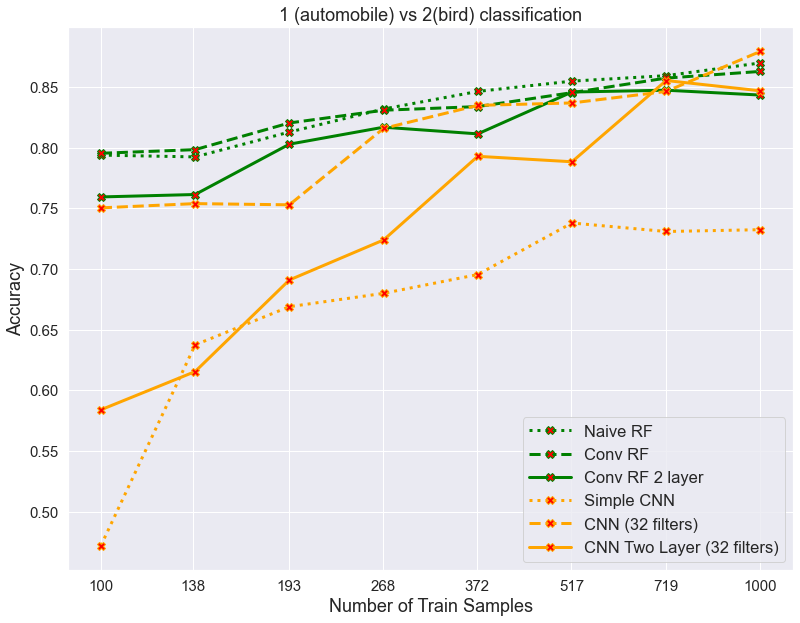

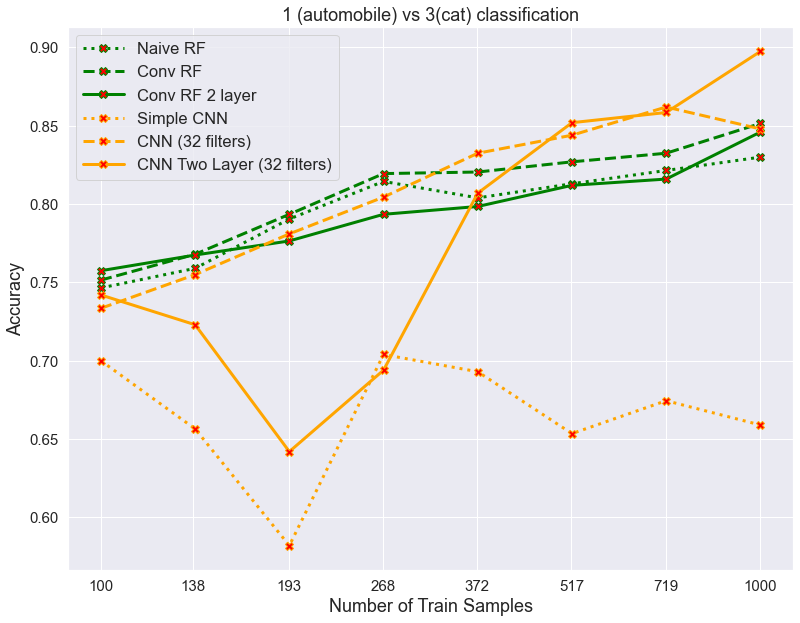

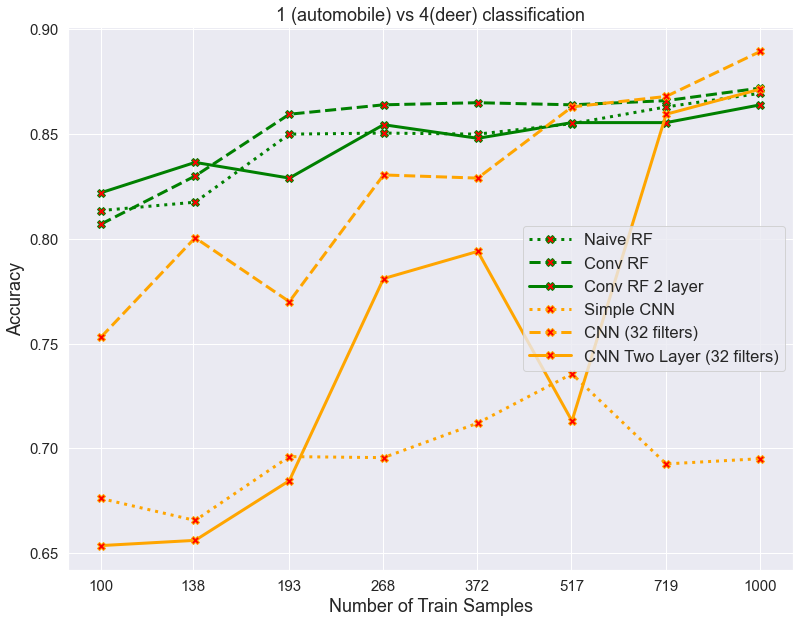

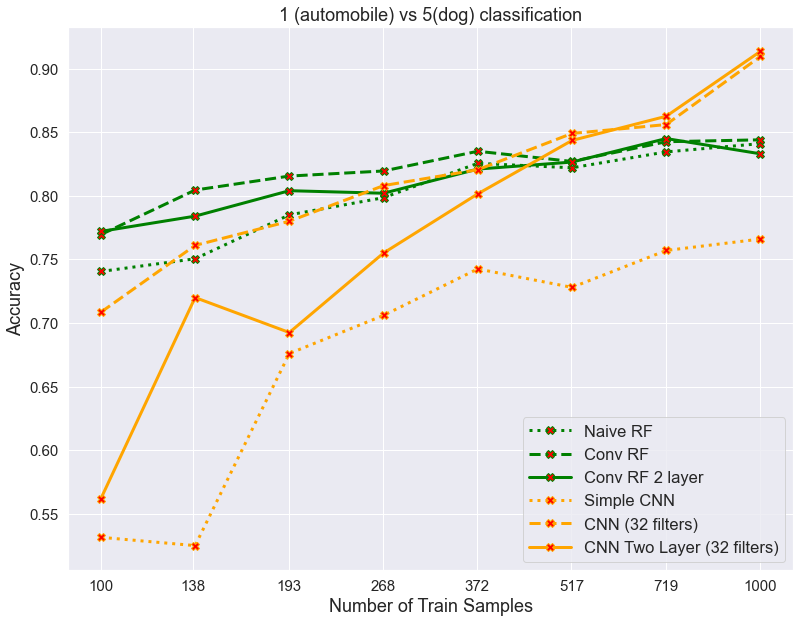

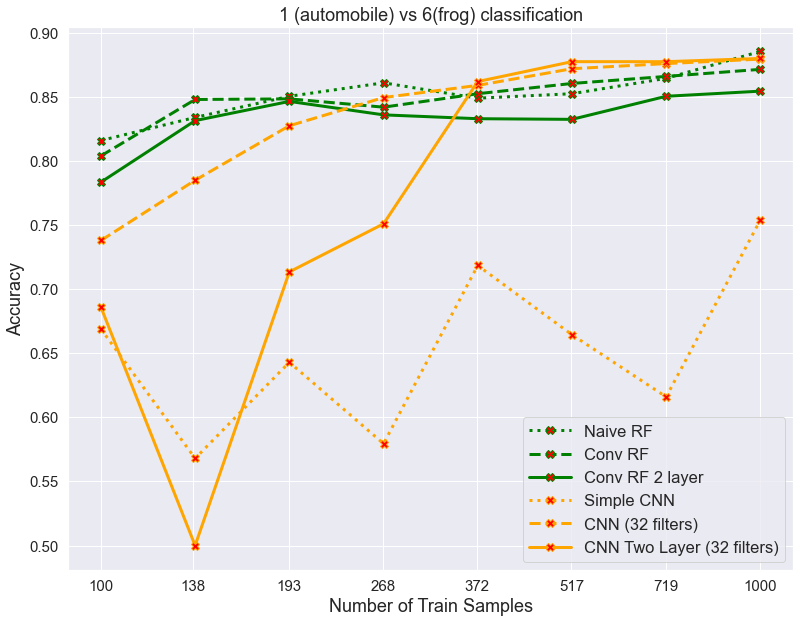

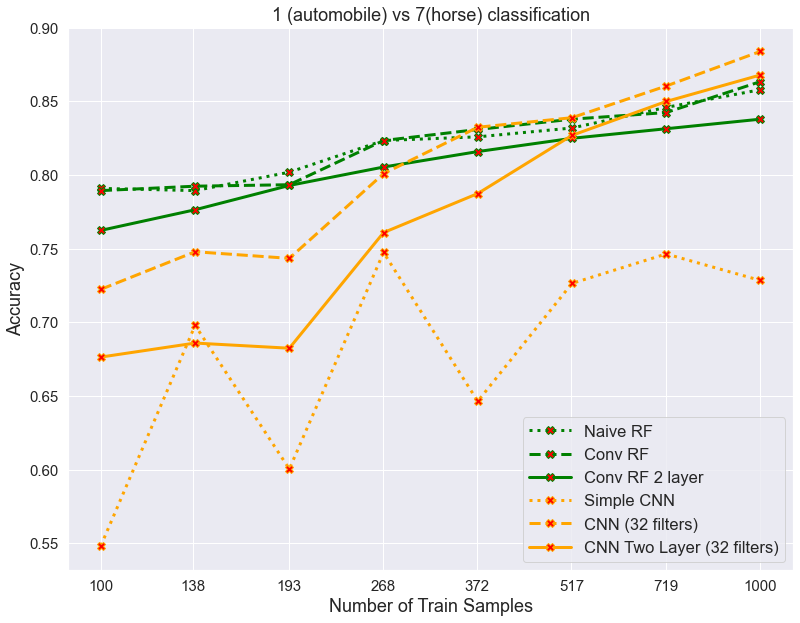

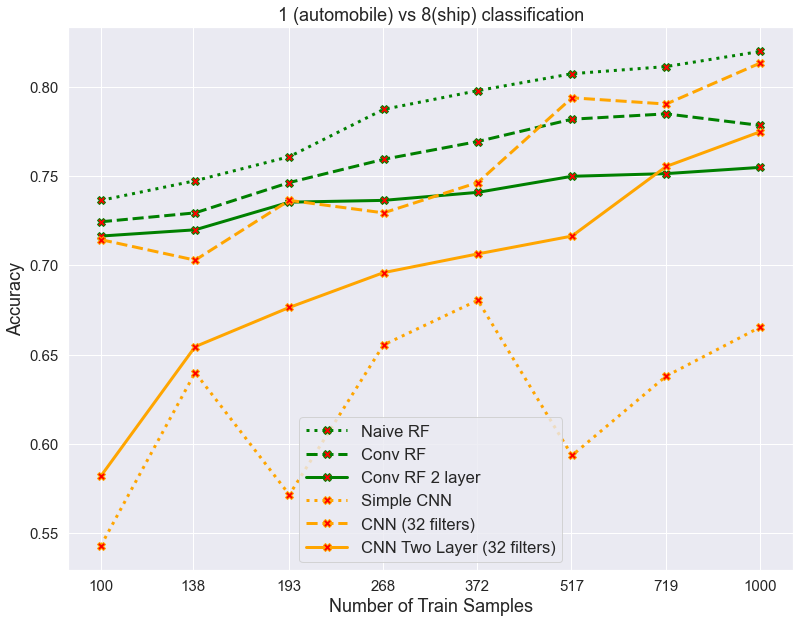

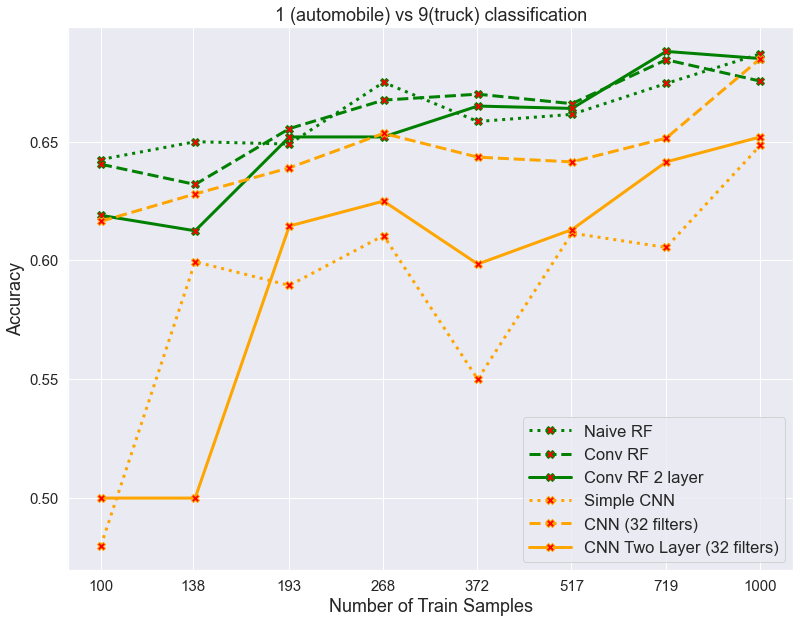

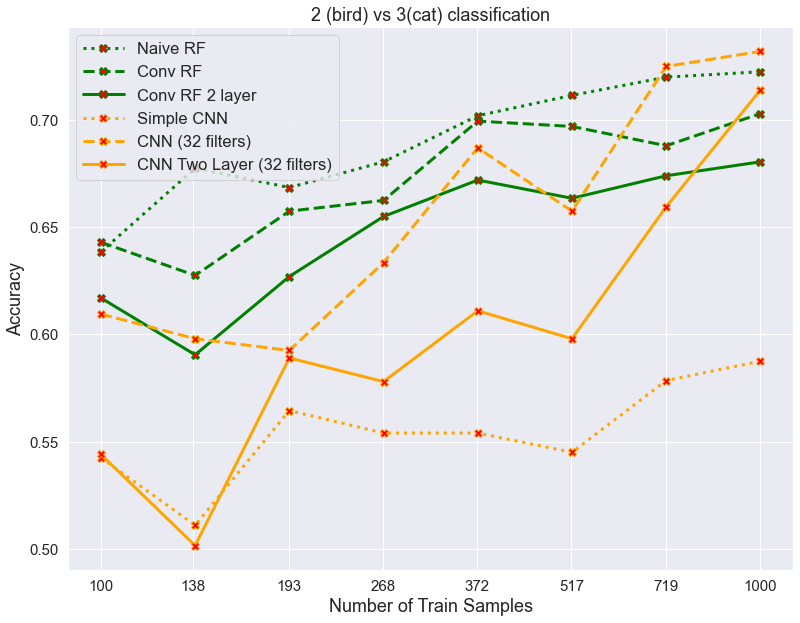

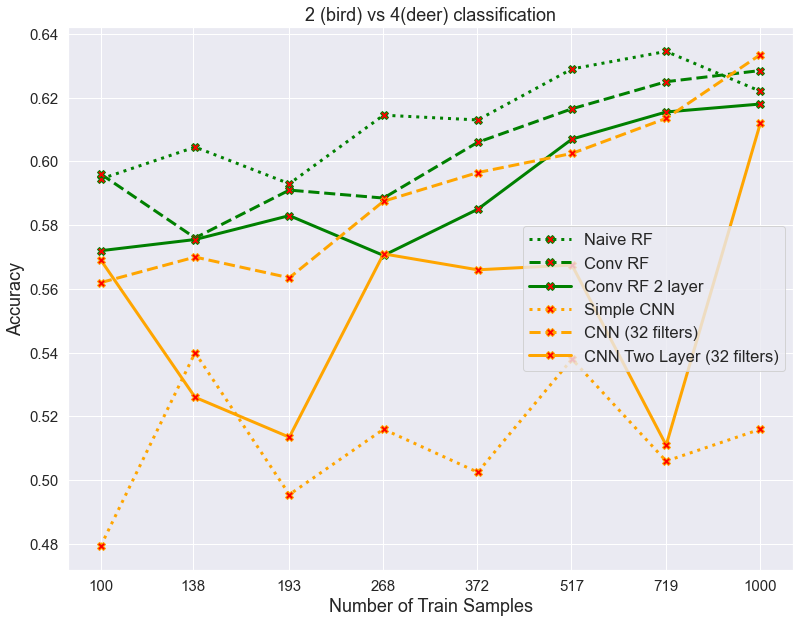

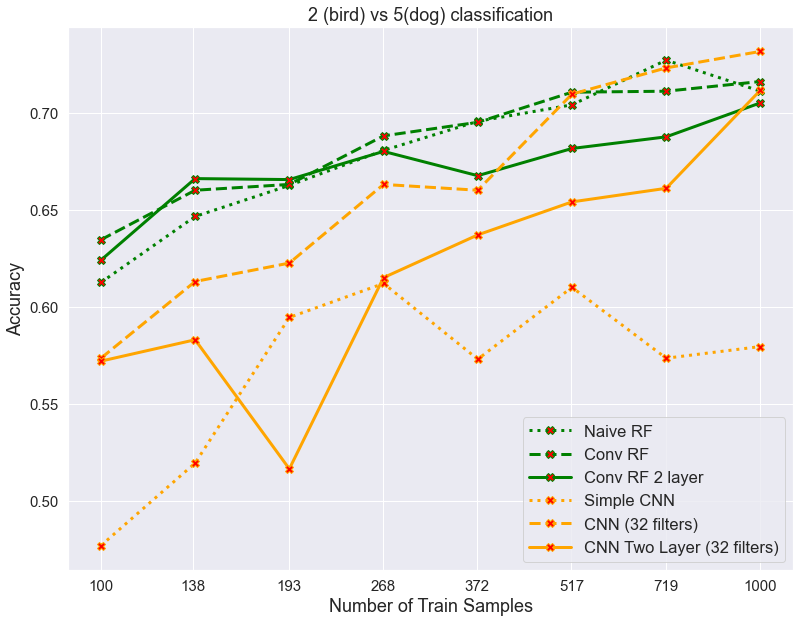

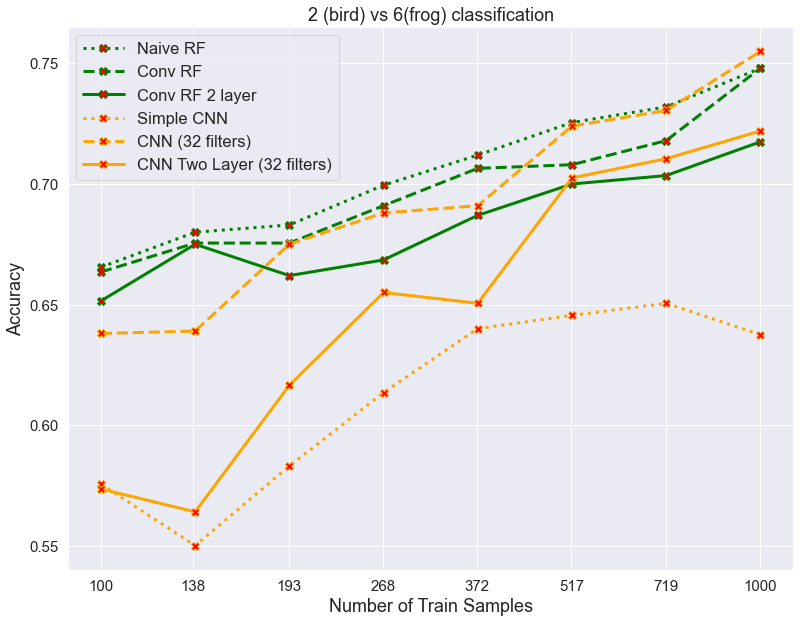

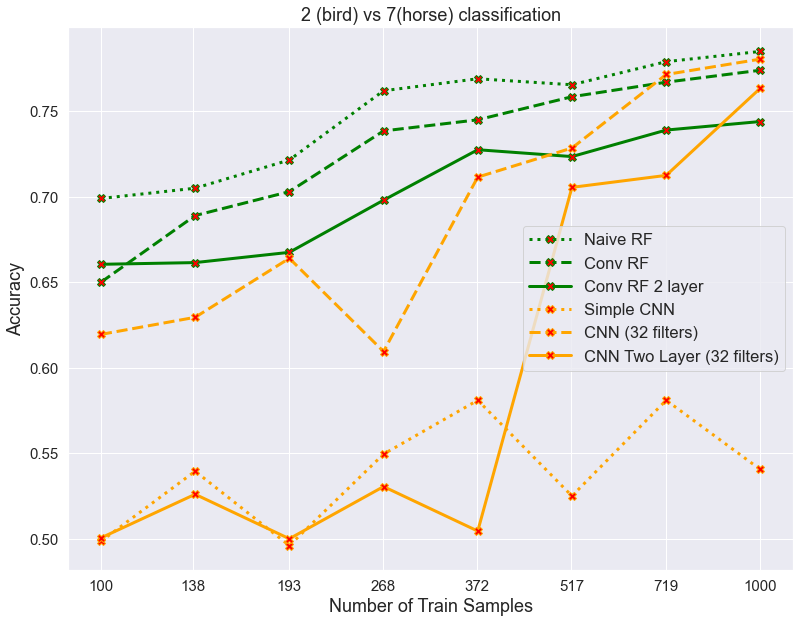

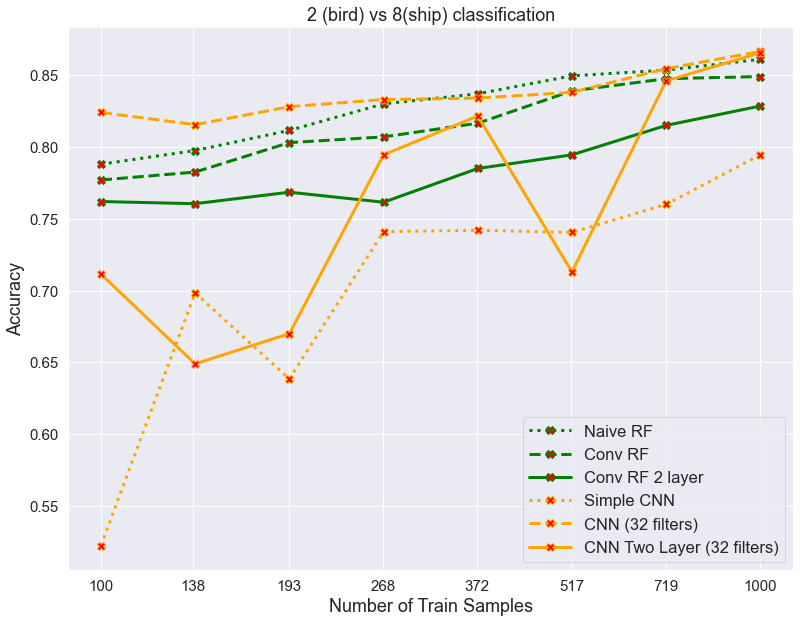

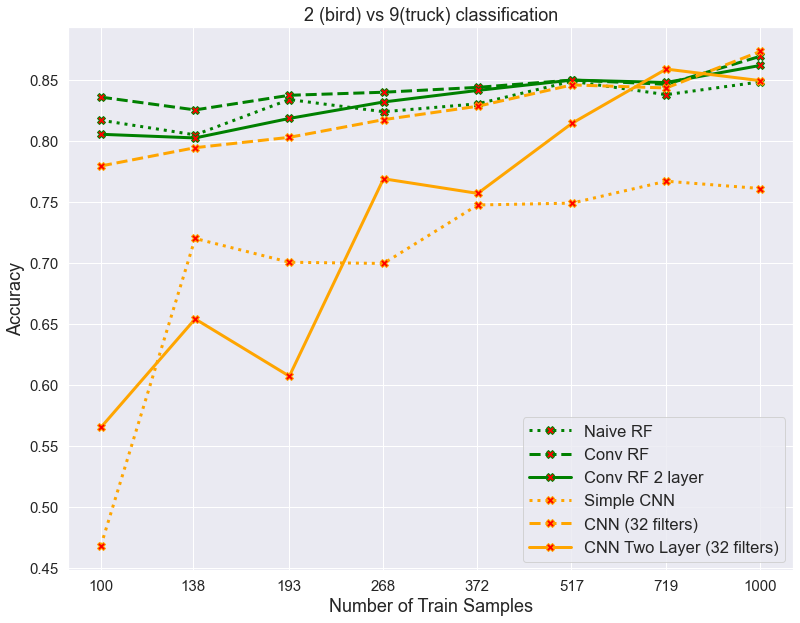

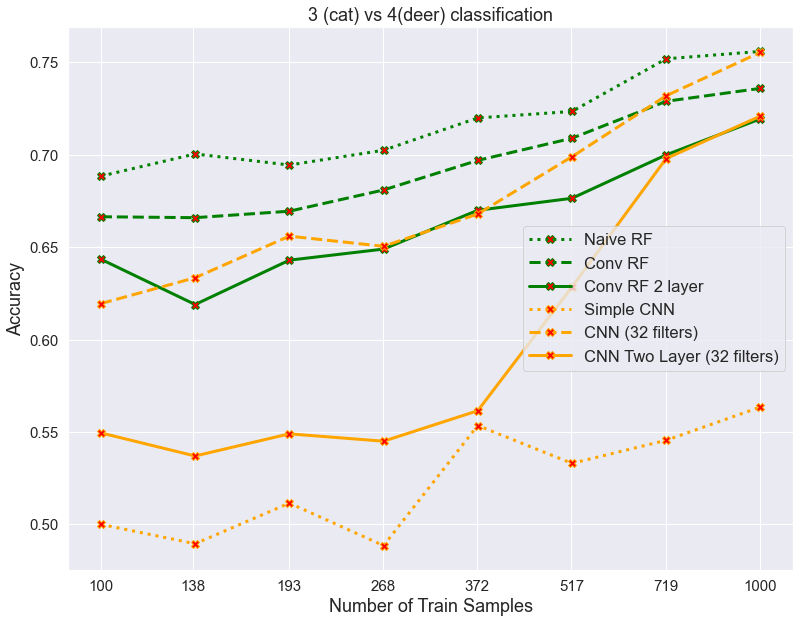

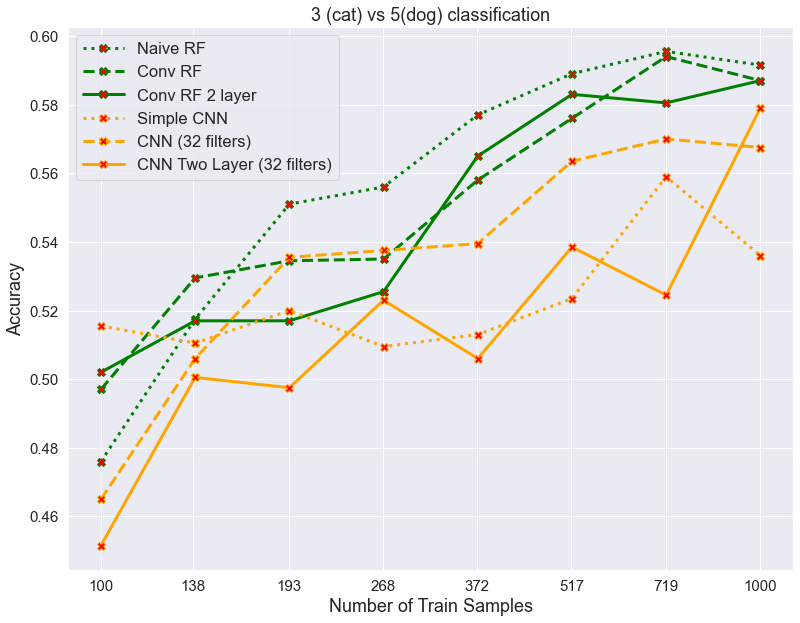

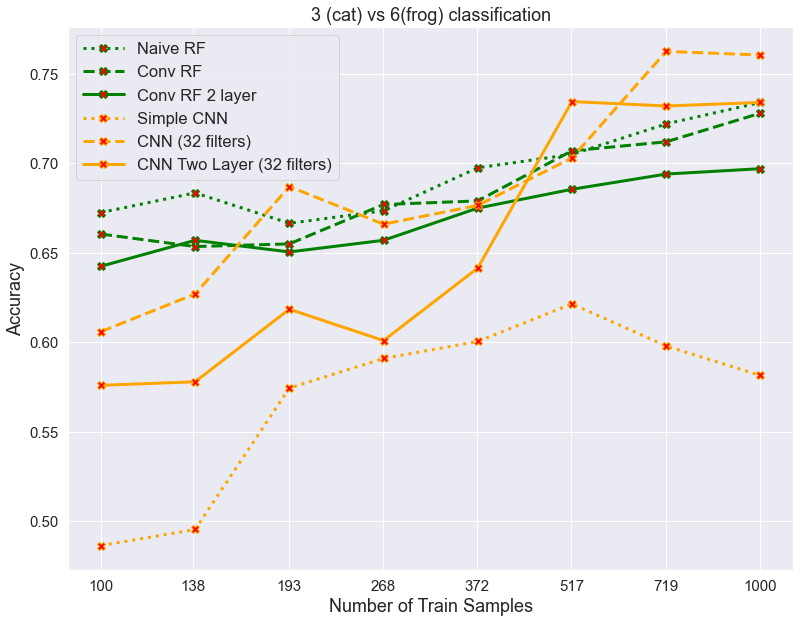

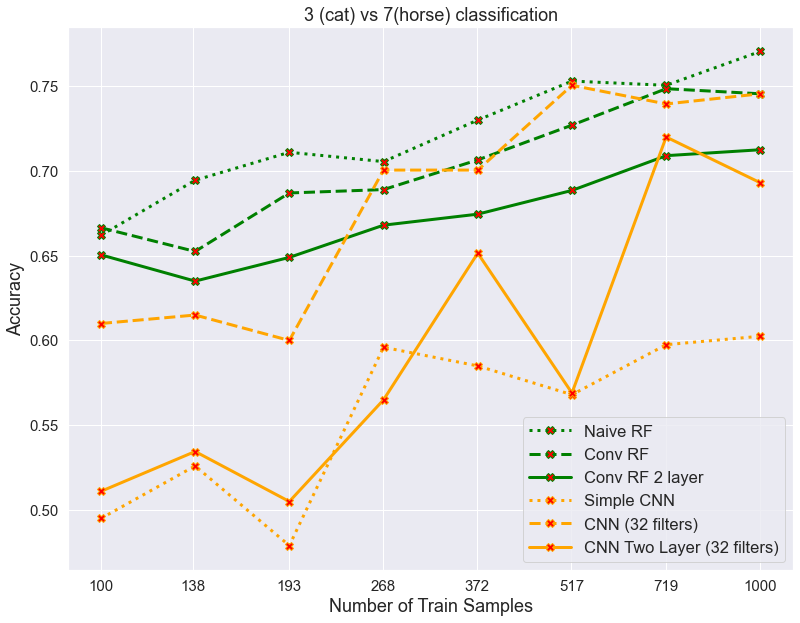

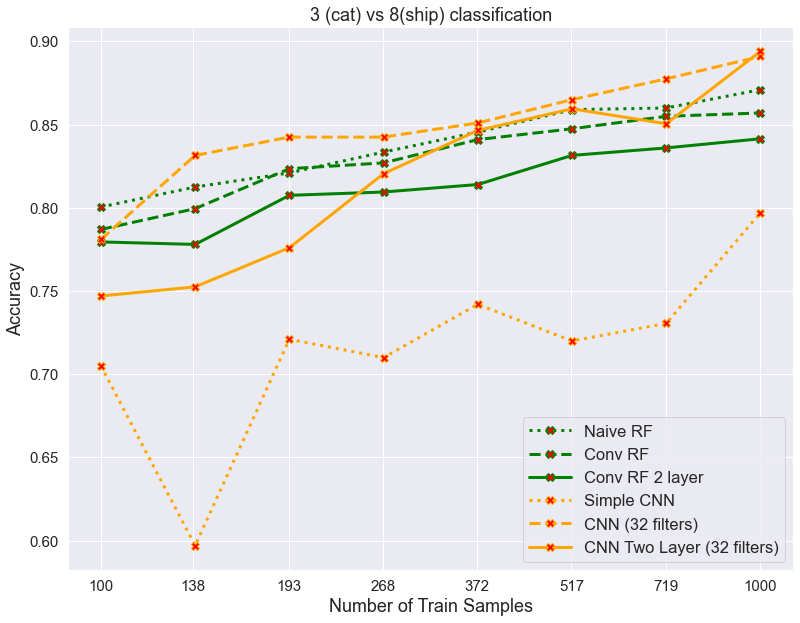

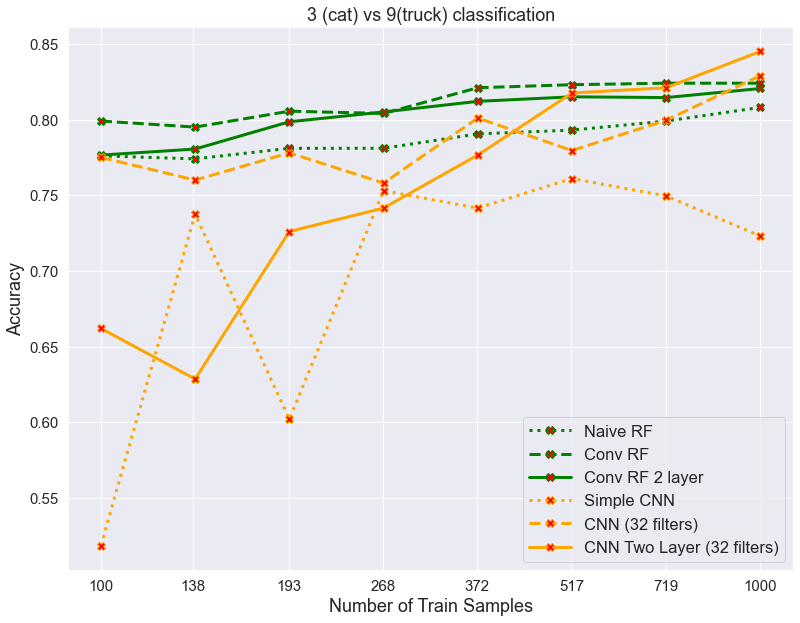

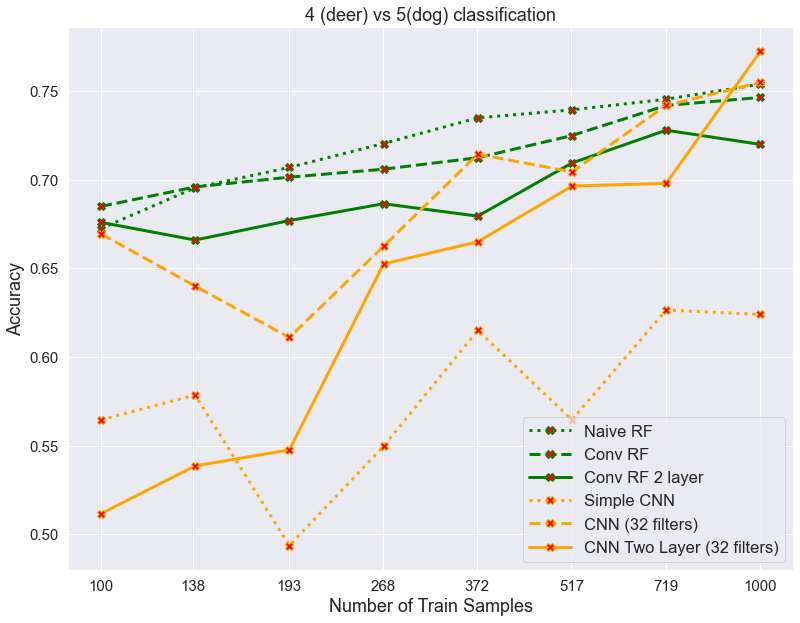

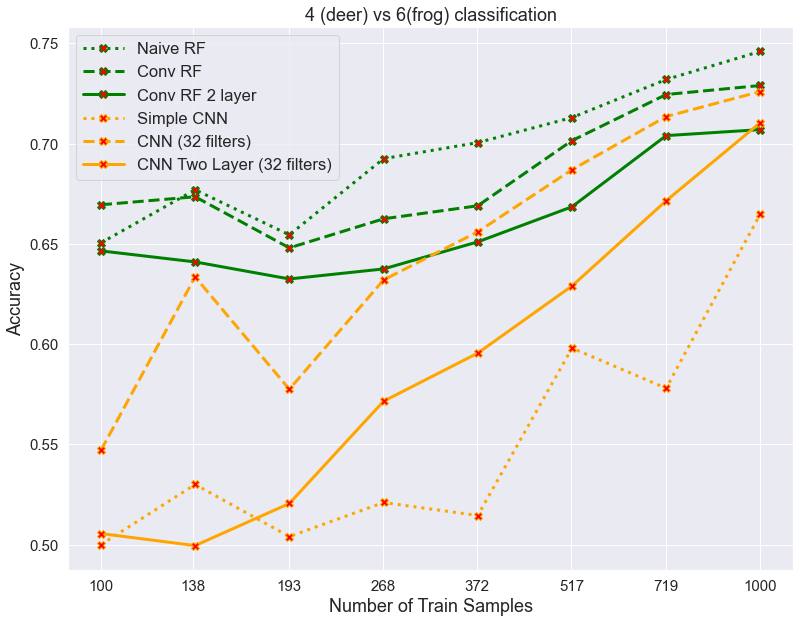

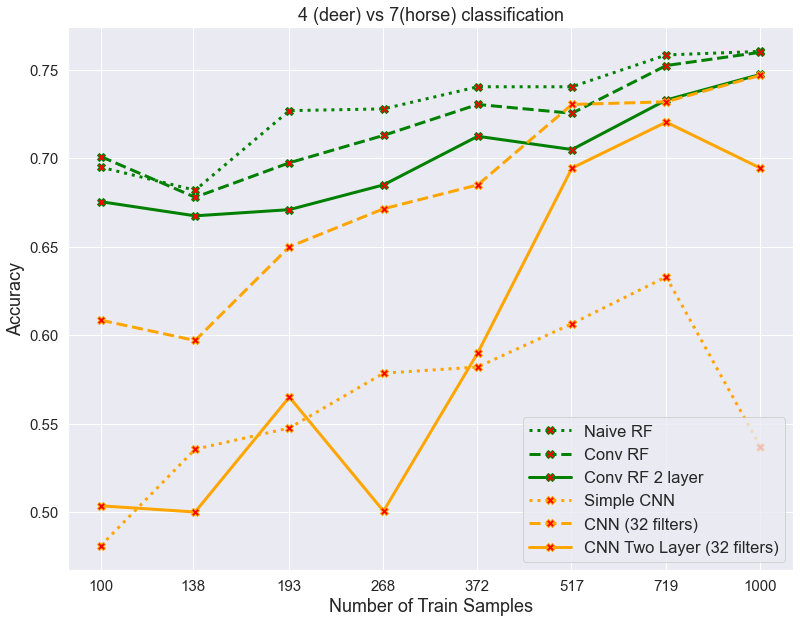

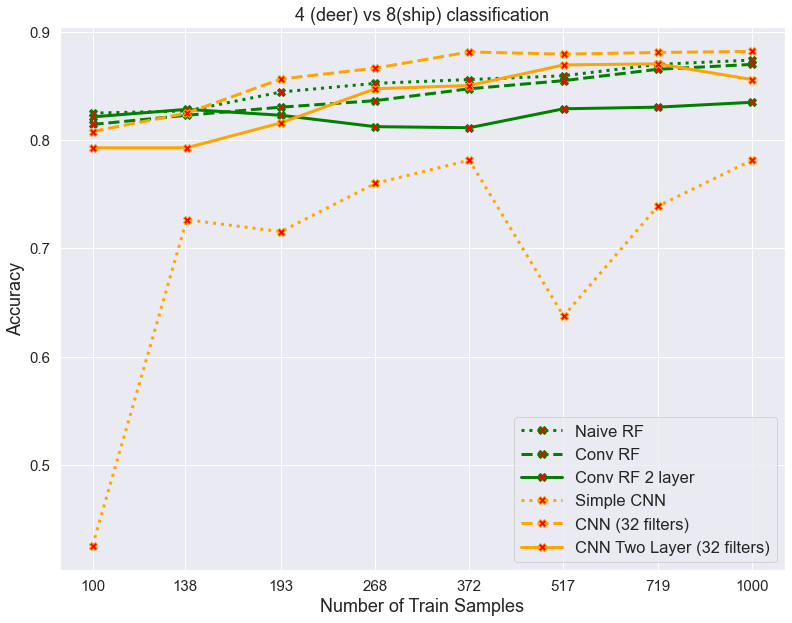

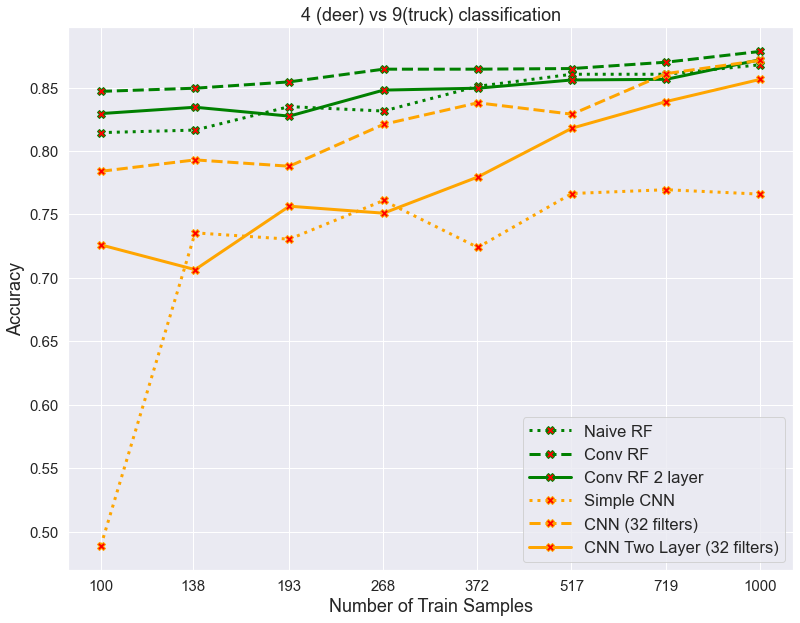

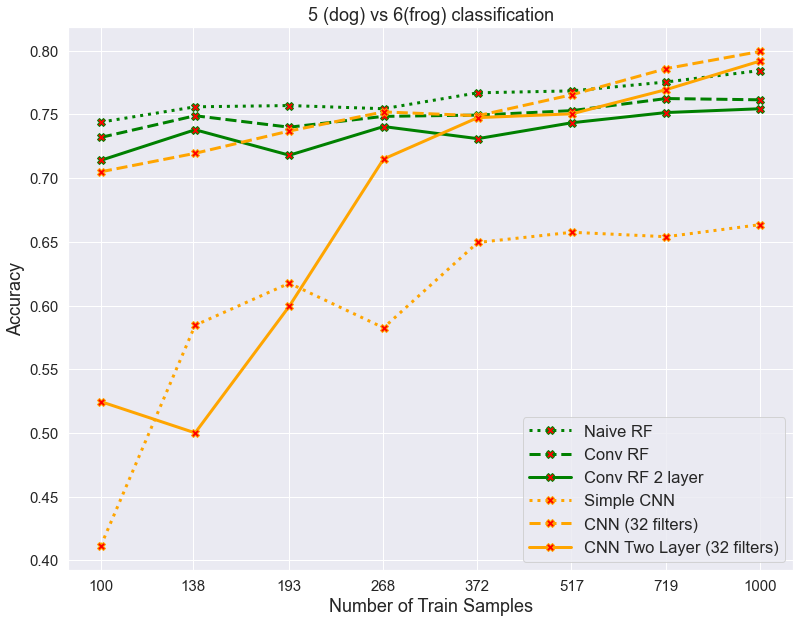

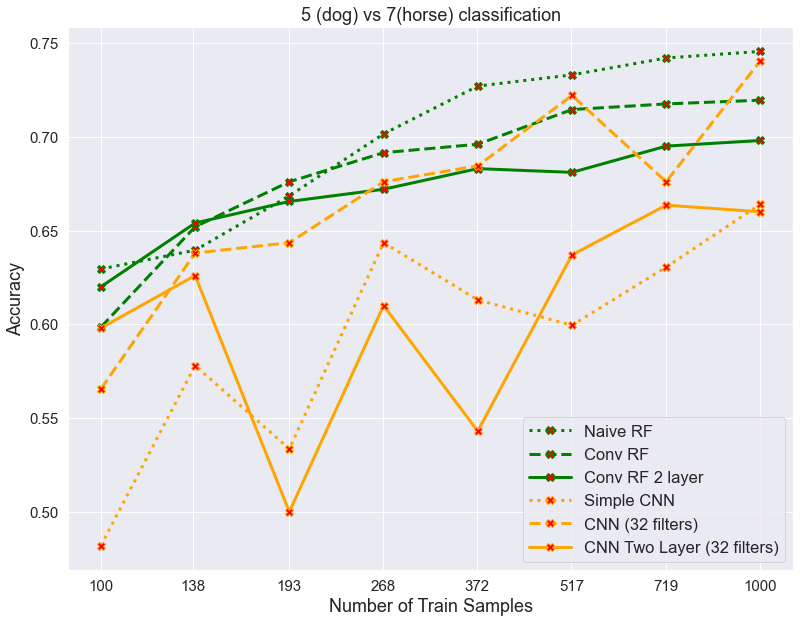

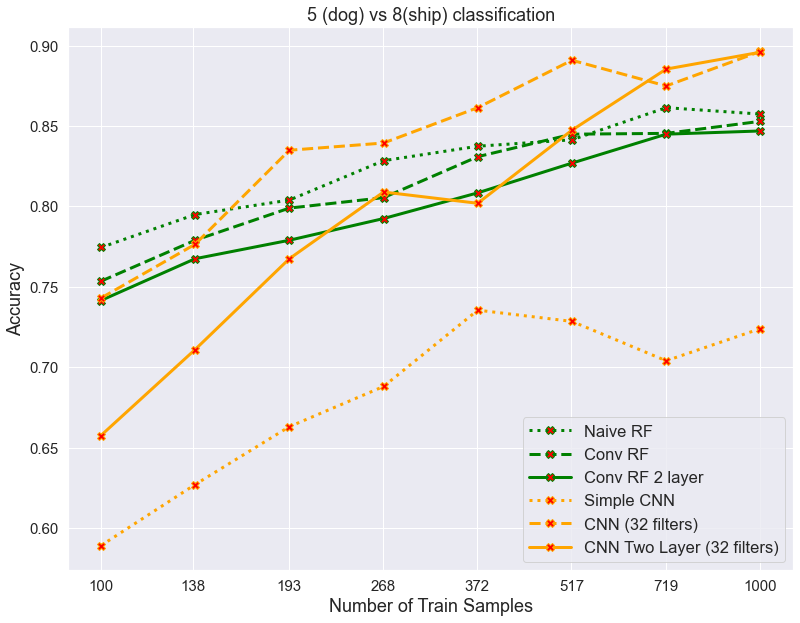

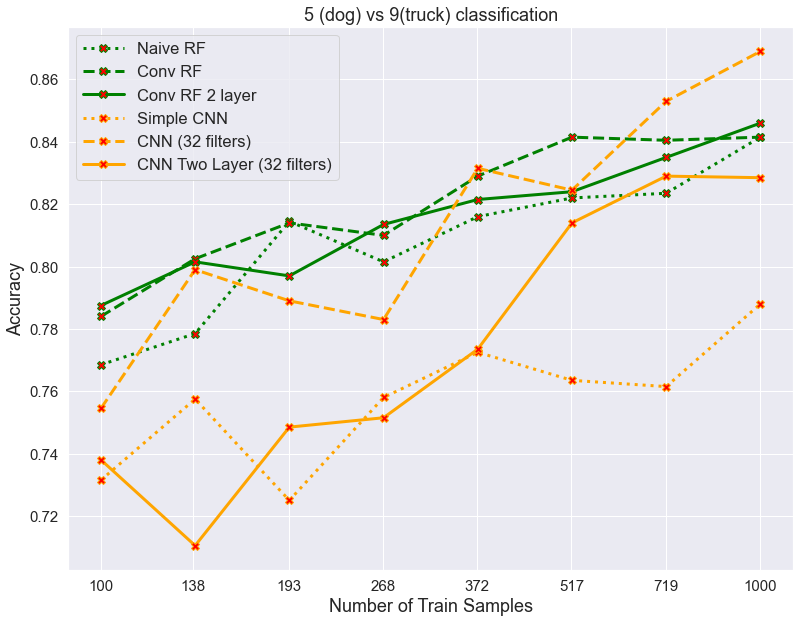

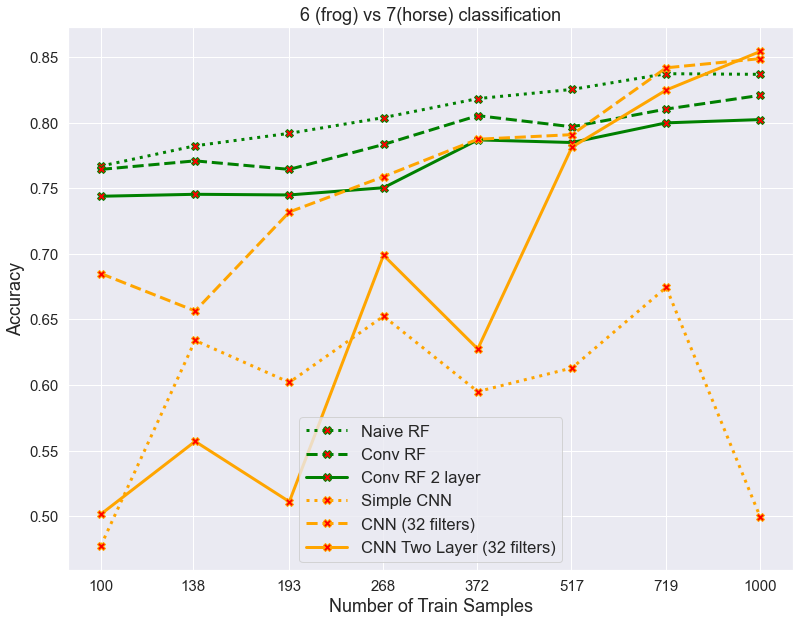

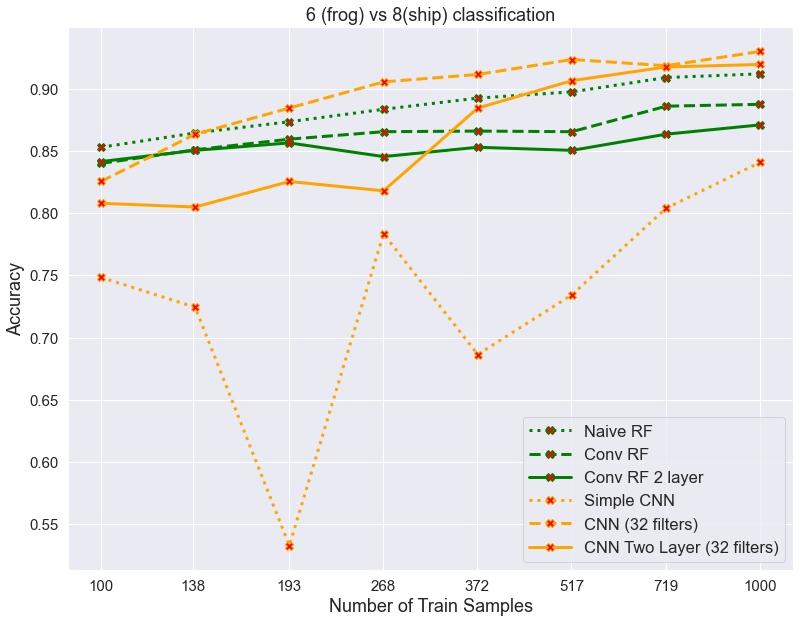

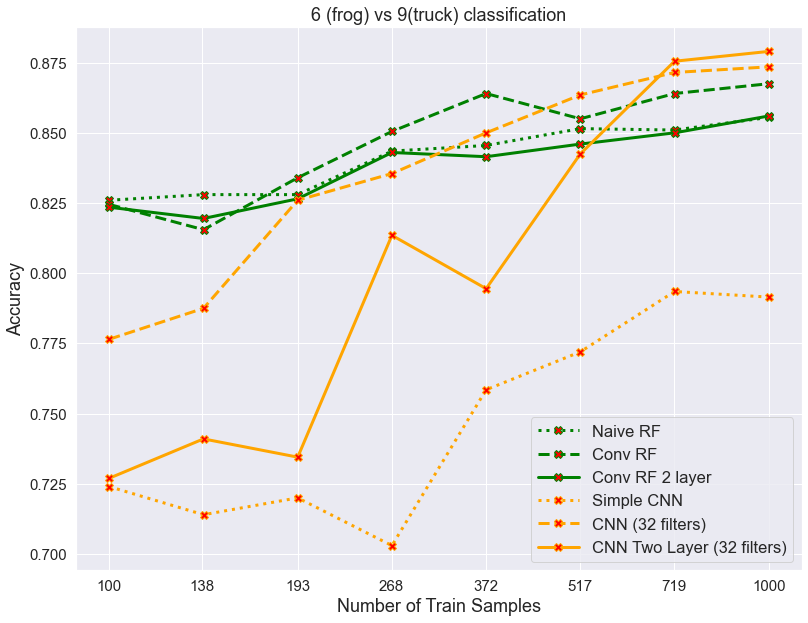

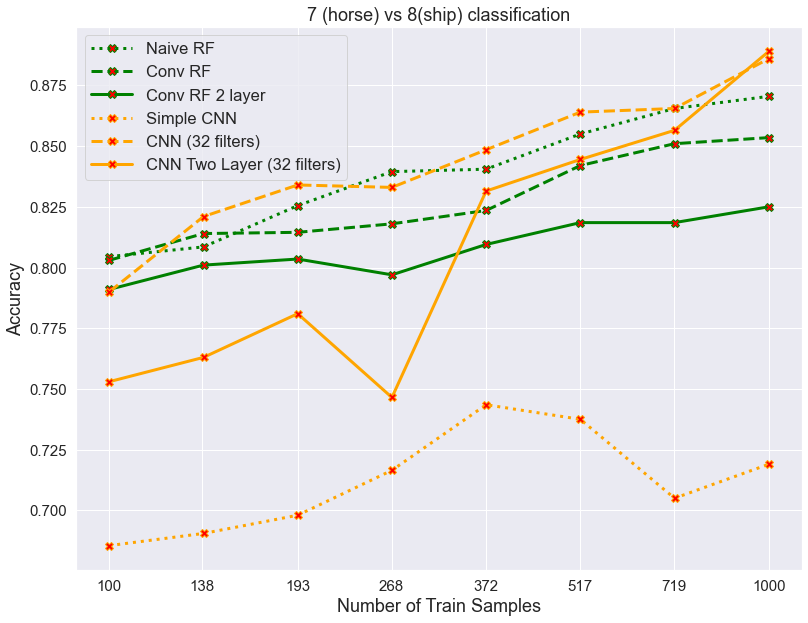

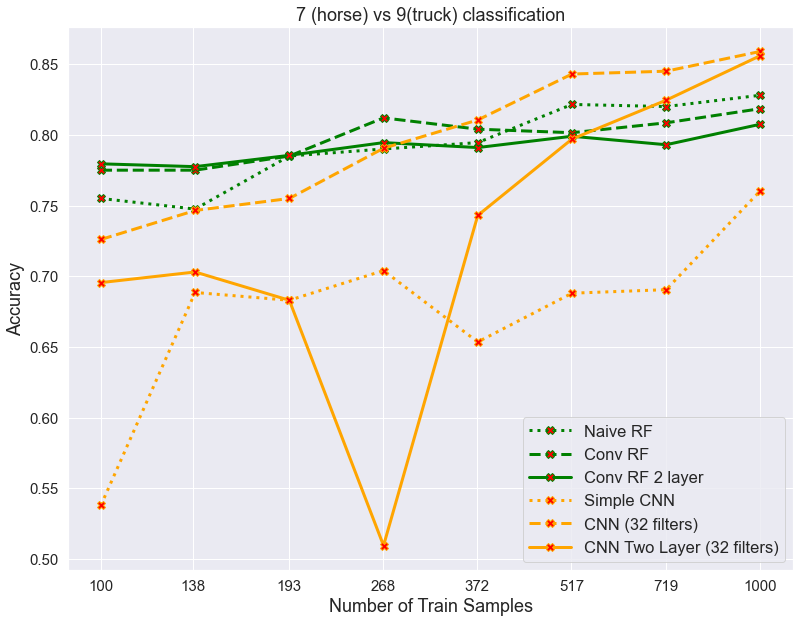

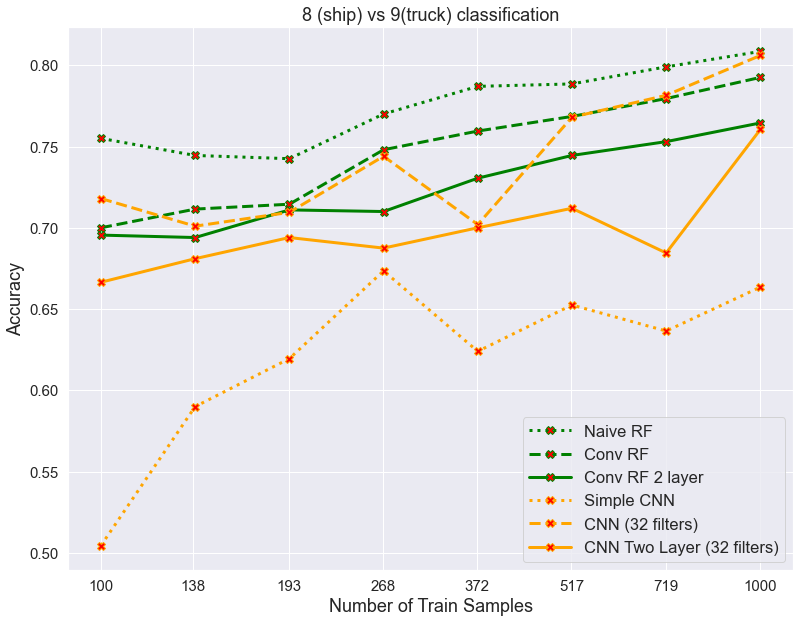

In [13]:
#go through 45 combinations of experiments
res = {}
for class1 in range(10):
    for class2 in range(class1 + 1, 10):
        
        # accuracy vs num training samples (naive_rf)      
        naive_rf_acc_vs_n = list()
        fraction_of_train_samples_space = np.geomspace(0.01, 1, num=8)
        for fraction_of_train_samples in fraction_of_train_samples_space:
            RF = RandomForestClassifier(n_estimators=100, n_jobs = -1)
            best_accuracy = np.mean([ConvRF.run_rf(RF, cifar_train_images, cifar_train_labels, cifar_test_images, cifar_test_labels, fraction_of_train_samples, class1, class2) for _ in range(5)])
            naive_rf_acc_vs_n.append(best_accuracy)           
        
        
           # accuracy vs num training samples (naive_rf)
        conv_rf_2_layer = list()
        for fraction_of_train_samples in fraction_of_train_samples_space:
            conv_rf_2l = ConvRF.ConvRFClassifier(layers = 2, kernel_size = (10, 5), stride = (2, 1))
            best_accuracy = np.mean([ConvRF.run_rf(conv_rf_2l, cifar_train_images, cifar_train_labels, cifar_test_images, cifar_test_labels, fraction_of_train_samples, class1, class2) for _ in range(5)])
            conv_rf_2_layer.append(best_accuracy)          
          
        # accuracy vs num training samples (naive_rf)
        conv_rf_apply = list()
        for fraction_of_train_samples in fraction_of_train_samples_space:
            conv_rf_a = ConvRF.ConvRFClassifier(layers = 1, kernel_size = (10,), stride = (2,))
            best_accuracy = np.mean([ConvRF.run_rf(conv_rf_a, cifar_train_images, cifar_train_labels, cifar_test_images, cifar_test_labels, fraction_of_train_samples, class1, class2) for _ in range(5)])
            conv_rf_apply.append(best_accuracy)
            
            
        # accuracy vs num training samples (one layer cnn (32 filters))
        cnn32_acc_vs_n = list()
        for fraction_of_train_samples in fraction_of_train_samples_space:
            best_accuracy = np.mean([ConvRF.run_cnn(SimpleCNN32Filter, cifar_train_images, cifar_train_labels, cifar_test_images, cifar_test_labels, fraction_of_train_samples, class1, class2, trainset, testset) for _ in range(5)])
            cnn32_acc_vs_n.append(best_accuracy)
            
        
        # accuracy vs num training samples (two layer cnn (32 filters))
        cnn32_two_layer_acc_vs_n = list()
        for fraction_of_train_samples in fraction_of_train_samples_space:
            best_accuracy = np.mean([ConvRF.run_cnn(SimpleCNN32Filter2Layers, cifar_train_images, cifar_train_labels, cifar_test_images, cifar_test_labels, fraction_of_train_samples, class1, class2, trainset, testset) for _ in range(5)])
            cnn32_two_layer_acc_vs_n.append(best_accuracy)

        
        # accuracy vs num training samples (one layer cnn)
        cnn_acc_vs_n = list()
        for fraction_of_train_samples in fraction_of_train_samples_space:
            best_accuracy = np.mean([ConvRF.run_cnn(SimpleCNNOneFilter, cifar_train_images, cifar_train_labels, cifar_test_images, cifar_test_labels, fraction_of_train_samples, class1, class2, trainset, testset) for _ in range(5)])
            cnn_acc_vs_n.append(best_accuracy) 
           
        plt.rcParams['figure.figsize'] = 13, 10
        plt.rcParams['font.size'] = 25
        plt.rcParams['legend.fontsize'] = 16.5
        plt.rcParams['legend.handlelength'] = 2.5
        plt.rcParams['figure.titlesize'] = 20
        plt.rcParams['xtick.labelsize'] = 15
        plt.rcParams['ytick.labelsize'] = 15
        
        fig, ax = plt.subplots() # create a new figure with a default 111 subplot
        ax.plot(fraction_of_train_samples_space*10000, naive_rf_acc_vs_n, marker='X', markerfacecolor='red', markersize=8, color='green', linewidth=3, linestyle=":", label="Naive RF")
        ax.plot(fraction_of_train_samples_space*10000, conv_rf_apply, marker='X', markerfacecolor='red', markersize=8, color='green', linewidth=3, linestyle="--", label="Conv RF")
        ax.plot(fraction_of_train_samples_space*10000, conv_rf_2_layer, marker='X', markerfacecolor='red', markersize=8, color='green', linewidth=3, label="Conv RF 2 layer")
        
        ax.plot(fraction_of_train_samples_space*10000, cnn_acc_vs_n, marker='X', markerfacecolor='red', markersize=8, color='orange', linewidth=3, linestyle=":", label="Simple CNN")
        ax.plot(fraction_of_train_samples_space*10000, cnn32_acc_vs_n, marker='X', markerfacecolor='red', markersize=8, color='orange', linewidth=3, linestyle="--", label="CNN (32 filters)")
        ax.plot(fraction_of_train_samples_space*10000, cnn32_two_layer_acc_vs_n, marker='X', markerfacecolor='red', markersize=8, color='orange', linewidth=3, label="CNN Two Layer (32 filters)")
        
        ax.set_xlabel('Number of Train Samples', fontsize=18)
        ax.set_xscale('log')
        ax.set_xticks([int(i*10000) for i in list(np.geomspace(0.01, 1, num=8))])
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        
        ax.set_ylabel('Accuracy', fontsize=18)
        
        ax.set_title(str(class1) + " (" + names[class1] + ") vs " + str(class2) + "(" + names[class2] + ") classification", fontsize=18)
        plt.legend()
        #plt.savefig("cifar_results/" + str(class1) + "_vs_" + str(class2))
        table = pd.DataFrame(np.concatenate(([naive_rf_acc_vs_n], [conv_rf_apply], [conv_rf_2_layer], [cnn_acc_vs_n], [cnn32_acc_vs_n],[cnn32_two_layer_acc_vs_n]), axis=0))
        algos = ['naiveRF', 'convrf', 'convrf2layer', 'simplecnn', 'cnn32', 'cnn32_2layer']
        table['algos'] = algos
        cols = table.columns.tolist()
        cols = [cols[-1]] + cols[:-1]
        cols = pd.Index(cols)
        table = table[cols]
        res[str(class1) + "_vs_" + str(class2)] = table
        #table.to_csv("cifar_results/" + str(class1) + "_vs_" + str(class2) + ".csv", index=False)
        print("Comparing %d vs %d" % (class1, class2))


Now we plot the Kappa Statistic differences between ConvRF and a naive forest.

([<matplotlib.axis.XTick at 0x2a526c774f0>,
 [Text(1, 0, '100'),
  Text(2, 0, '194'),
  Text(3, 0, '372'),
  Text(4, 0, '720'),
  Text(5, 0, '1390'),
  Text(6, 0, '2682'),
  Text(7, 0, '5180'),
  Text(8, 0, '10000')])

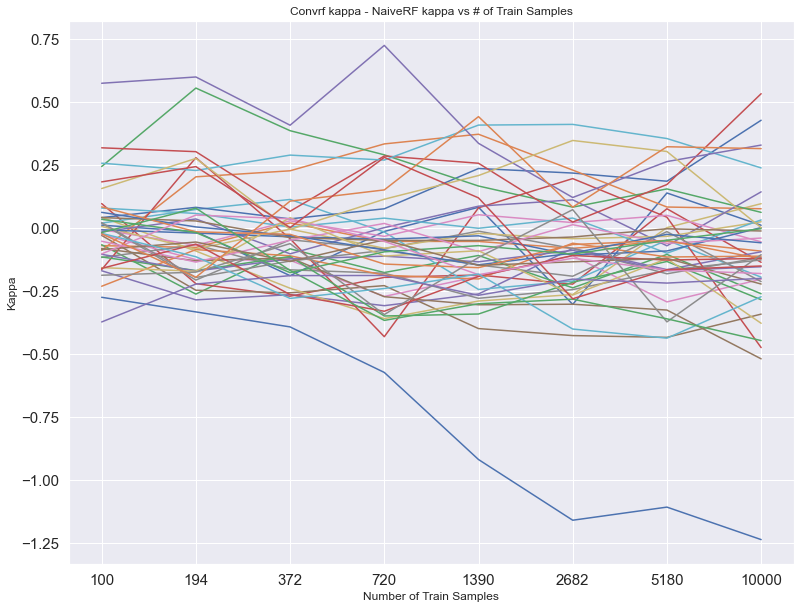

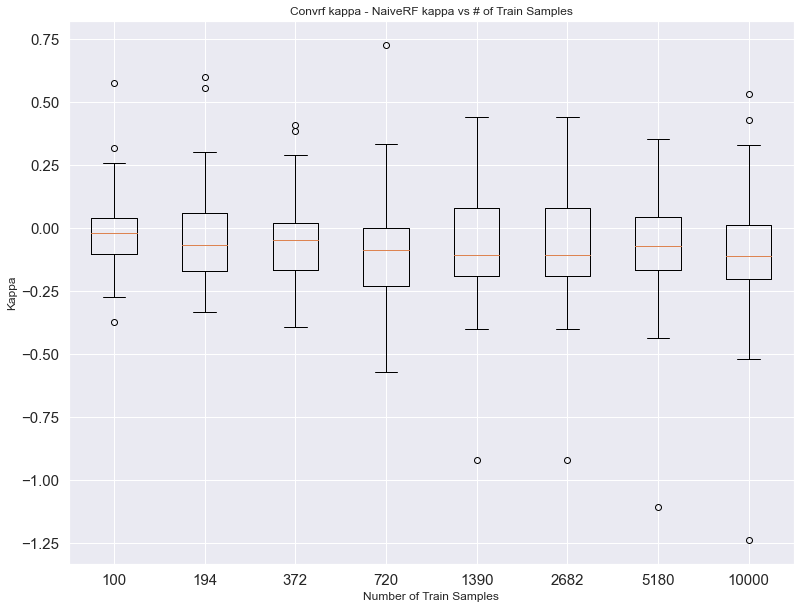

In [41]:
#convrf vs naiverf
kappas_conv_naive = []
xs = []
for class1 in range(10):
    for class2 in range(class1 + 1, 10):
        results = res[str(class1) + "_vs_" + str(class2)]
        rf_err = .5 / (1 - results.iloc[0][1:])
        convrf_err = .5 / (1 - results.iloc[1][1:])
        kappa = convrf_err - rf_err
        kappas_conv_naive.extend(kappa)
        xs.extend([1, 2, 3, 4, 5, 6, 7, 8])

ind1 = range(0, len(xs), 8)
ind2 = range(1, len(xs), 8)
ind3 = range(2, len(xs), 8)
ind4 = range(3, len(xs), 8)
ind5 = range(4, len(xs), 8)
ind6 = range(5, len(xs), 8)
ind7 = range(6, len(xs), 8)
ind8 = range(7, len(xs), 8)

plt.clf()
for i in range(45):
    plt.plot(xs[i*8:i*8+8], kappas_conv_naive[i*8:i*8+8])
plt.xticks([1,2, 3, 4, 5, 6, 7, 8], ['100', '194', '372', '720', '1390', '2682', '5180', '10000'])
plt.xlabel('Number of Train Samples')
plt.ylabel('Kappa')
plt.title('Convrf kappa - NaiveRF kappa vs # of Train Samples')
#plt.savefig('Conv/kappas/convrf-naiverf kappa line')

plt.figure()
plt.clf()
box1 = [(kappas_conv_naive[i]) for i in ind1]
box2 = [(kappas_conv_naive[i]) for i in ind2]
box3 = [(kappas_conv_naive[i]) for i in ind3]
box4 = [(kappas_conv_naive[i]) for i in ind4]
box5 = [(kappas_conv_naive[i]) for i in ind5]
box6 = [(kappas_conv_naive[i]) for i in ind6]
box7 = [(kappas_conv_naive[i]) for i in ind7]
box8 = [(kappas_conv_naive[i]) for i in ind8]
boxs = [box1, box2, box3, box4, box5, box5, box7, box8]

plt.boxplot(boxs)
plt.xlabel('Number of Train Samples')
plt.ylabel('Kappa')
plt.title('Convrf kappa - NaiveRF kappa vs # of Train Samples')
plt.xticks([1,2, 3, 4, 5, 6, 7, 8], ['100', '194', '372', '720', '1390', '2682', '5180', '10000'])
#plt.savefig('Conv/kappas/convrf-naiverf kappa box')


Now we plot the Kappa Statistic differences between ConvRF and simple CNN.

([<matplotlib.axis.XTick at 0x2a5269d8610>,
 [Text(1, 0, '100'),
  Text(2, 0, '194'),
  Text(3, 0, '372'),
  Text(4, 0, '720'),
  Text(5, 0, '1390'),
  Text(6, 0, '2682'),
  Text(7, 0, '5180'),
  Text(8, 0, '10000')])

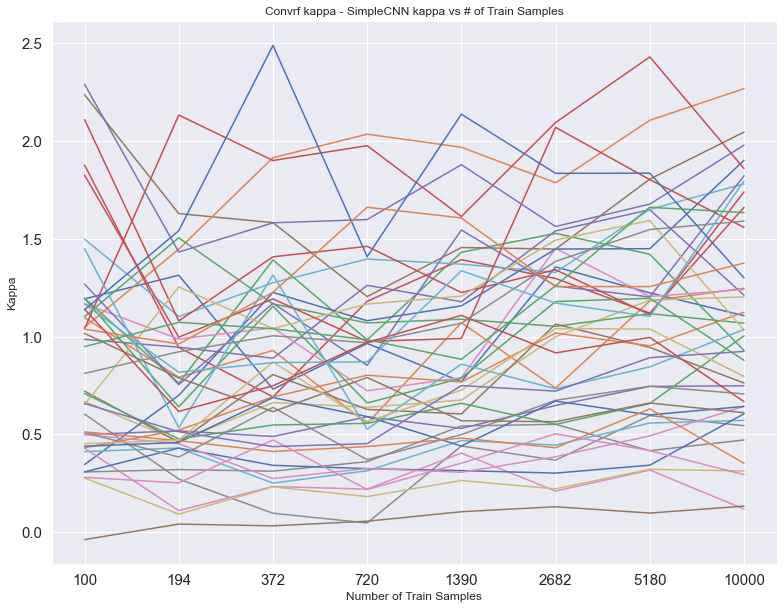

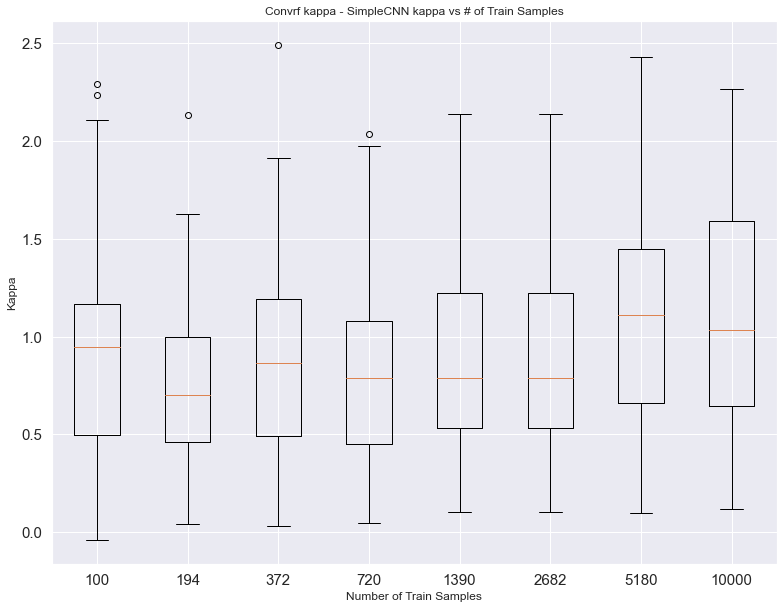

In [42]:
#ConvRF vs simple cnn
kappas_conv_cnn = []
xs = []
for class1 in range(10):
    for class2 in range(class1 + 1, 10):
        results = res[str(class1) + "_vs_" + str(class2)]
        cnn_err = .5 / (1 - results.iloc[3][1:])
        convrf_err = .5 / (1 - results.iloc[1][1:])
        kappa = convrf_err - cnn_err
        kappas_conv_cnn.extend(kappa)
        xs.extend([1, 2, 3, 4, 5, 6, 7, 8])
       
plt.clf()
for i in range(45):
    plt.plot(xs[i*8:i*8+8], kappas_conv_cnn[i*8:i*8+8])
plt.xticks([1,2, 3, 4, 5, 6, 7, 8], ['100', '194', '372', '720', '1390', '2682', '5180', '10000'])
plt.xlabel('Number of Train Samples')
plt.ylabel('Kappa')
plt.title('Convrf kappa - SimpleCNN kappa vs # of Train Samples')
#plt.savefig('Conv/kappas/convrf-SimpleCNN kappa scatter')

plt.figure()
plt.clf()
box1 = [(kappas_conv_cnn[i]) for i in ind1]
box2 = [(kappas_conv_cnn[i]) for i in ind2]
box3 = [(kappas_conv_cnn[i]) for i in ind3]
box4 = [(kappas_conv_cnn[i]) for i in ind4]
box5 = [(kappas_conv_cnn[i]) for i in ind5]
box6 = [(kappas_conv_cnn[i]) for i in ind6]
box7 = [(kappas_conv_cnn[i]) for i in ind7]
box8 = [(kappas_conv_cnn[i]) for i in ind8]
boxs = [box1, box2, box3, box4, box5, box5, box7, box8]

plt.boxplot(boxs)
plt.xlabel('Number of Train Samples')
plt.ylabel('Kappa')
plt.title('Convrf kappa - SimpleCNN kappa vs # of Train Samples')
plt.xticks([1,2, 3, 4, 5, 6, 7, 8], ['100', '194', '372', '720', '1390', '2682', '5180', '10000'])
#plt.savefig('Conv/kappas/convrf-SimpleCNN kappa box')


Now we plot the Kappa Statistic differences between ConvRF and more complex CNN.

([<matplotlib.axis.XTick at 0x2a524e81550>,
 [Text(1, 0, '100'),
  Text(2, 0, '194'),
  Text(3, 0, '372'),
  Text(4, 0, '720'),
  Text(5, 0, '1390'),
  Text(6, 0, '2682'),
  Text(7, 0, '5180'),
  Text(8, 0, '10000')])

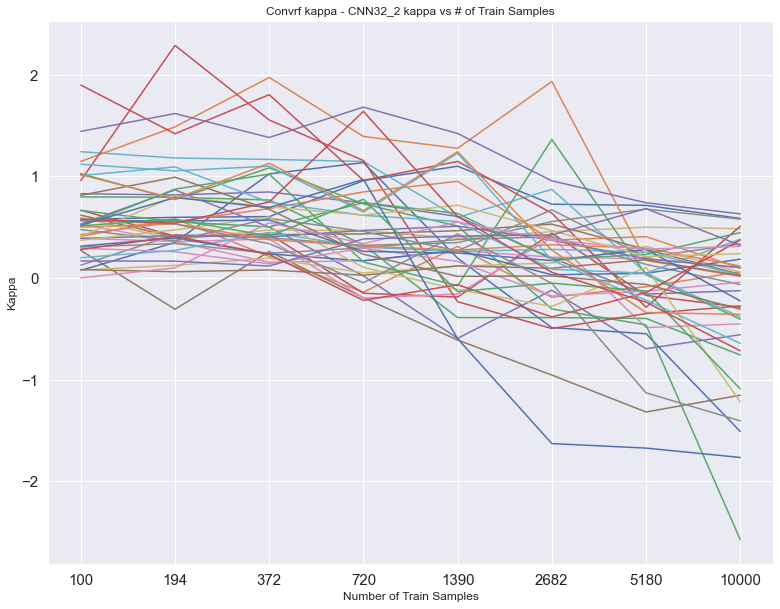

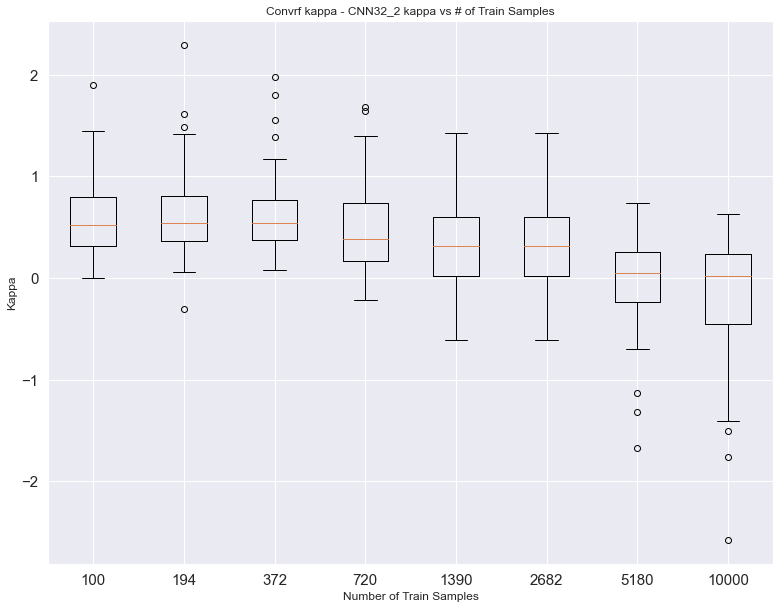

In [43]:
#ConvRF vs CNN 32 filter
kappas_conv_cnn32 = []
xs = []
for class1 in range(10):
    for class2 in range(class1 + 1, 10):
        results = res[str(class1) + "_vs_" + str(class2)]
        cnn32_err = .5 / (1 - results.iloc[5][1:])
        convrf_err = .5 / (1 - results.iloc[1][1:])
        kappa = convrf_err - cnn32_err
        kappas_conv_cnn32.extend(kappa)
        xs.extend([1, 2, 3, 4, 5, 6, 7, 8])


plt.clf()
for i in range(45):
    plt.plot(xs[i*8:i*8+8], kappas_conv_cnn32[i*8:i*8+8])
plt.xticks([1,2, 3, 4, 5, 6, 7, 8], ['100', '194', '372', '720', '1390', '2682', '5180', '10000'])
plt.xlabel('Number of Train Samples')
plt.ylabel('Kappa')
plt.title('Convrf kappa - CNN32_2 kappa vs # of Train Samples')
#plt.savefig('Conv/kappas/convrf-CNN32_2 kappa scatter')

plt.figure()
plt.clf()
box1 = [(kappas_conv_cnn32[i]) for i in ind1]
box2 = [(kappas_conv_cnn32[i]) for i in ind2]
box3 = [(kappas_conv_cnn32[i]) for i in ind3]
box4 = [(kappas_conv_cnn32[i]) for i in ind4]
box5 = [(kappas_conv_cnn32[i]) for i in ind5]
box6 = [(kappas_conv_cnn32[i]) for i in ind6]
box7 = [(kappas_conv_cnn32[i]) for i in ind7]
box8 = [(kappas_conv_cnn32[i]) for i in ind8]
boxs = [box1, box2, box3, box4, box5, box5, box7, box8]

plt.boxplot(boxs)
plt.xlabel('Number of Train Samples')
plt.ylabel('Kappa')
plt.title('Convrf kappa - CNN32_2 kappa vs # of Train Samples')
plt.xticks([1,2, 3, 4, 5, 6, 7, 8], ['100', '194', '372', '720', '1390', '2682', '5180', '10000'])
#plt.savefig('Conv/kappas/convrf-CNN32_2 kappa box')